# Atividade 7(a)
* **Nome:** Matheus Freitas Martins 
* **Matrícula:** ES111281

# Importando dependências

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Carregando dados

In [2]:
data = pd.read_csv('breastcancerwisconsin.csv')

# Preparando os dados

In [3]:
# Eliminar coluna 'Unnamed: 32' e 'id'
data = data.drop(['Unnamed: 32', 'id'], axis=1)

# Mapear a coluna 'diagnosis' para valores numéricos
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Dividindo os dados em conjuntos de treinamento e teste

In [4]:
# treino (70%), validação (15%) e teste (15%)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Criando pipeline para cada algoritmo

In [5]:
log_reg_pipeline = Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression(random_state=42))])
rand_forest_pipeline = Pipeline([('scaler', StandardScaler()), ('rand_forest', RandomForestClassifier(random_state=42))])

# Ajustando os hiperparâmetros para Regressão Logística e Random Forest

In [6]:
# log_reg__C: Controla a força da regularização, ajudando a evitar overfitting. Valores menores resultam em maior penalidade e regularização mais forte.
## default: 1.0
# log_reg__solver: Define o algoritmo de otimização utilizado no treinamento do modelo de Regressão Logística.
## default: 'lbfgs'
# log_reg__max_iter: refere-se ao número máximo de iterações que o algoritmo de otimização deve executar antes de parar. 
## default: 100
log_reg_param_grid = {
    'log_reg__C': np.logspace(-4, 4, 10),
    'log_reg__solver': ['newton-cg', 'lbfgs'],
    'log_reg__max_iter': [1000, 5000, 10000]
}


# rand_forest__n_estimators: Controla o número de árvores de decisão na floresta aleatória, afetando a capacidade de generalização e o tempo de treinamento.
## default: 100
# rand_forest__max_depth: Controla a profundidade máxima das árvores de decisão, ajudando a evitar overfitting e influenciando a capacidade do modelo de aprender padrões complexos.
## default: none 
# rand_forest__min_samples_split: Controla o número mínimo de amostras necessárias para dividir um nó interno, ajudando a evitar overfitting e influenciando a capacidade do modelo de aprender padrões complexos.
## default: 2
# rand_forest__min_samples_leaf: Controla o número mínimo de amostras necessárias para formar um nó terminal (folha) 
## default: 1
# rand_forest__max_features: Determina o número de recursos considerados ao procurar a melhor divisão em cada nó da árvore
## default: auto
rand_forest_param_grid = {'rand_forest__n_estimators': [10, 50, 100, 200],
                          'rand_forest__max_depth': [None, 10, 30, 50],
                          'rand_forest__min_samples_split': [2, 5, 10],
                          'rand_forest__min_samples_leaf': [1, 2, 4],
                          'rand_forest__max_features': ['sqrt']}




# Buscando os melhores hiperparâmetros + validação cruzada

In [7]:
log_reg_grid = GridSearchCV(log_reg_pipeline, log_reg_param_grid, cv=5)
rand_forest_grid = GridSearchCV(rand_forest_pipeline, rand_forest_param_grid, cv=5)

# Treinando e avaliando os modelos

In [8]:
log_reg_grid.fit(X_train, y_train)
rand_forest_grid.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print('Melhores hiperparâmetros para Regressão Logística:', log_reg_grid.best_params_)
print('\nMelhores hiperparâmetros para Random Forest:', rand_forest_grid.best_params_)

# acurácia dos modelos otimizados
log_reg_acc = accuracy_score(y_val, log_reg_grid.predict(X_val))
rand_forest_acc = accuracy_score(y_val, rand_forest_grid.predict(X_val))

print('\nAcurácia da Regressão Logística otimizada:', log_reg_acc)
print('Acurácia do Random Forest otimizado:', rand_forest_acc)

# Acurácia dos modelos otimizados no conjunto de testes
log_reg_test_acc = accuracy_score(y_test, log_reg_grid.predict(X_test))
rand_forest_test_acc = accuracy_score(y_test, rand_forest_grid.predict(X_test))

print('\nAcurácia da Regressão Logística otimizada no conjunto de testes:', log_reg_test_acc)
print('Acurácia do Random Forest otimizado no conjunto de testes:', rand_forest_test_acc)


Melhores hiperparâmetros para Regressão Logística: {'log_reg__C': 2.782559402207126, 'log_reg__max_iter': 1000, 'log_reg__solver': 'newton-cg'}

Melhores hiperparâmetros para Random Forest: {'rand_forest__max_depth': None, 'rand_forest__max_features': 'sqrt', 'rand_forest__min_samples_leaf': 2, 'rand_forest__min_samples_split': 2, 'rand_forest__n_estimators': 200}

Acurácia da Regressão Logística otimizada: 0.9882352941176471
Acurácia do Random Forest otimizado: 0.9647058823529412

Acurácia da Regressão Logística otimizada no conjunto de testes: 0.9767441860465116
Acurácia do Random Forest otimizado no conjunto de testes: 0.9767441860465116


# 7 b (continuação)
Persista o melhor modelo alcançado para ser implantado em um sistema, e crie uma API para acessá-lo em um servidor

In [9]:
# framework Flask para criar a API
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [10]:
# Biblioteca para salvar o melhor modelo
import pickle

In [11]:
best_model = log_reg_grid if log_reg_test_acc > rand_forest_test_acc else rand_forest_grid
pickle.dump(best_model, open('best_model.pkl', 'wb'))

## Utilizando ambiente virtual (venv) 

In [ ]:
# Ativando o ambiente virtual
# python -m venv venv
# venv\Scripts\activate

# Instalando Flask e outras dependências
# pip install flask pandas scikit-learn

# Executar o server.py
# python server.py

# Arquivo server.py (API)

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd

app = Flask(__name__)

# Carregar o modelo salvo
model = pickle.load(open('best_model.pkl', 'rb'))

@app.route('/predict', methods=['POST'])
def predict():
    # Obter os dados enviados como JSON
    data = request.get_json(force=True)

    # Converter os dados em um DataFrame do pandas
    input_data = pd.DataFrame(data, index=[0])

    # Fazer a previsão usando o modelo carregado
    prediction = model.predict(input_data)

    # Enviar a previsão como resposta
    return jsonify({'prediction': int(prediction[0])})

if __name__ == '__main__':
    app.run(debug=True)


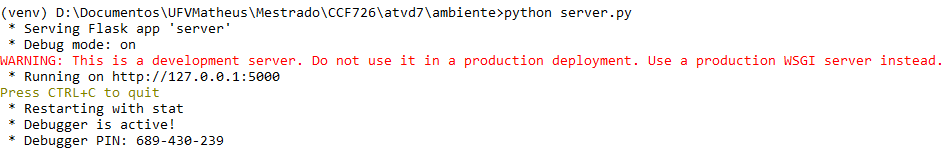

# Arquivo predict.py

In [ ]:
import requests
import json

url = "http://127.0.0.1:5000/predict"

data = {
	"radius_mean": 12.0,
    "texture_mean": 15.0,
    "perimeter_mean": 85.0,
    "area_mean": 550.0,
    "smoothness_mean": 0.1,
    "compactness_mean": 0.08,
    "concavity_mean": 0.06,
    "concave points_mean": 0.05,
    "symmetry_mean": 0.18,
    "fractal_dimension_mean": 0.06,
    "radius_se": 0.3,
    "texture_se": 0.8,
    "perimeter_se": 2.1,
    "area_se": 25.0,
    "smoothness_se": 0.005,
    "compactness_se": 0.02,
    "concavity_se": 0.02,
    "concave points_se": 0.01,
    "symmetry_se": 0.01,
    "fractal_dimension_se": 0.003,
    "radius_worst": 14.0,
    "texture_worst": 20.0,
    "perimeter_worst": 100.0,
    "area_worst": 800.0,
    "smoothness_worst": 0.15,
    "compactness_worst": 0.3,
    "concavity_worst": 0.25,
    "concave points_worst": 0.15,
    "symmetry_worst": 0.3,
    "fractal_dimension_worst": 0.1
}

headers = {'Content-Type': 'application/json'}

response = requests.post(url, data=json.dumps(data), headers=headers)

print("Response status code:", response.status_code)
print("Response content:", response.text)

if response.status_code == 200:
    try:
        print(response.json())
    except json.JSONDecodeError:
        print("A resposta não está no formato JSON válido.")
else:
    print("Ocorreu um erro na solicitação. Verifique o conteúdo da resposta para obter mais informações.")


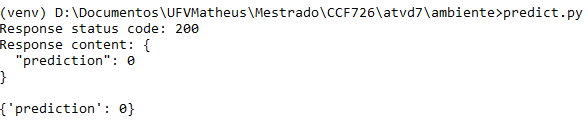

Como foi possível observar, o predict usando a API foi enviado por meio de uma solicitação POST contendo as features em formato JSON. 

A resposta acima contém o predict do modelo, no caso um valor de 0, que corresponde à classe "B" (benigna) do conjunto de dados do câncer de mama.